# Artificial Neural Networks With Keras

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras

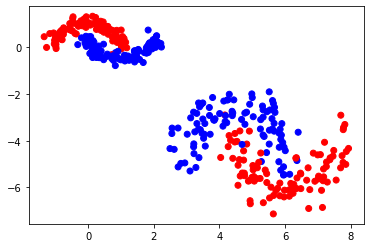

In [14]:
from sklearn.datasets import make_moons

X1, y1 = make_moons(200, noise=0.15, shuffle=True)
X2, y2 = make_moons(200, noise=0.2, shuffle=True)
X = np.concatenate([X1, (X2+[3, -2])*[1.5, 2.5]])
y = np.concatenate([y1, ~y2])
colors = np.array(['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.show()

In [16]:
y[:5]

array([0, 1, 1, 1, 0])

In [17]:
y = keras.utils.to_categorical(y, num_classes=2)

In [18]:
y[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## The Functional API

In [24]:
input_layer = keras.layers.Input(shape=(2, ))
hidden_layer = keras.layers.Dense(16, activation='relu')(input_layer)
output_layer = keras.layers.Dense(2, activation='softmax')(hidden_layer)

ann_model = keras.Model(inputs=input_layer, outputs=output_layer)
ann_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [27]:
ann_model = keras.Model(inputs=input_layer, outputs=output_layer)

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

n_epochs = 100 # <- play around with n_epochs

history = ann_model.fit(X, y, validation_split=0.2, batch_size=32, epochs=n_epochs)

Epoch 1/100
10/10 [==============================] - 1s 38ms/step - loss: 0.5460 - accuracy: 0.7781 - val_loss: 0.6112 - val_accuracy: 0.7875
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5393 - accuracy: 0.7688 - val_loss: 0.6051 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5333 - accuracy: 0.7937 - val_loss: 0.6015 - val_accuracy: 0.8625
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.8188 - val_loss: 0.5999 - val_accuracy: 0.8875
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5219 - accuracy: 0.8219 - val_loss: 0.5915 - val_accuracy: 0.8500
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5170 - accuracy: 0.8125 - val_loss: 0.5850 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.8031 - val_loss: 0.5803 - val_accuracy: 0.8250
Epoch 8/100


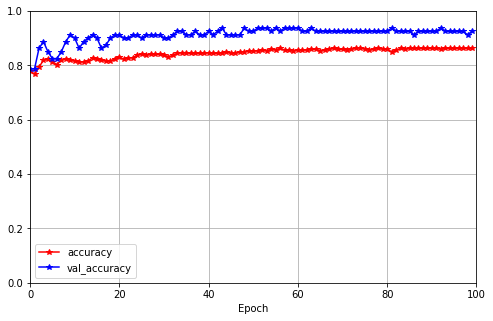

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(
    figsize=(8, 5), xlim=[0, n_epochs], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r-*", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

## The Sequential API

In [9]:
activation = 'relu'
ann_model = keras.Sequential([
    keras.layers.Input(shape=(2)),
    keras.layers.Dense(32, activation=activation),
    keras.layers.Dense(32, activation=activation),
    keras.layers.Dense(16, activation=activation),
    keras.layers.Dense(2, activation='softmax')
])

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

n_epochs = 100
history = ann_model.fit(X, y, validation_split=0.2, batch_size=64, epochs=n_epochs, verbose=0)

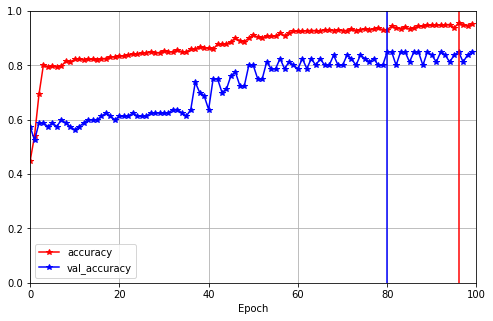

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(
    figsize=(8, 5), xlim=[0, n_epochs], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r-*", "b-*"])
plt.axvline(np.argmax(history.history['val_accuracy']), c='blue')
plt.axvline(np.argmax(history.history['accuracy']), c='red')
plt.legend(loc="lower left")  # extra code
plt.show()